<h1>Sprint8: Data Visualization with Python Project</h1>

---

<h1>Project Description</h1>

For Sprint 8's project, we are given a dataset and a graphical representation. The primary objective is to replicate the given graphical depiction using the supplied dataset wtih either the Seaborn or Plotly library.

The dataset encompasses the outcomes of a simulated research study, wherein 100 red squirrels were subjected to one of three distinct dietary regimes post-weaning, and their final adult weights were meticulously documented. 
The graphical representation presented below encapsulates the findings of this investigation and serves as the benchmark for the replication task. 
The choice between Seaborn and Plotly is placed by my discretion. 
Upon completion, we are required to submit a Jupyter Notebook in .ipynb format, inclusive of your code implementation and the resultant figure it generates. 
To pass, the reviewer will execute my code and juxtapose my figure against the original.

![graph image](S8PROJECT_recreate-graph.png)


<u><h3>The deliverables to replicate within the project:</h3></u>

- Title and axis labels
- Axis ticks and their respective ranges
- Legend
- Magenta and green data points (the color exactness is not obligatory)
- Data grouping and presentation
- Other attributes of the figure, such as font size, style, or image dimensions, may be tailored tomy preference.
- Utilize official documentation or external references to address tasks not explicitly covered in this course section supplemented by additional resources as needed.

Furthermore, there is a disclaimer stated within the project that there can be multiple valid solutions to this project. The code's specifics will depend on whether Seaborn or Plotly is opted for. And even within a single library, various methods may be employed to achieve the same outcome.

> - project description is also available through README.md on my github repository where project and all necessary files are also uploaded: https://github.com/stxphz/Sprint8-Project


In [59]:
# adding necessary packages to run script and render plots

!pip install --upgrade pip

In [60]:
# adding necessary packages to run script and render plots

!pip install plotly

In [61]:
# adding necessary packages to run script and render plots

!pip install plotly-express

In [62]:
# adding necessary packages to run script and render plots

!pip install notebook

In [63]:
# adding necessary packages to run script and render plots

!pip install ipython

In [64]:
# adding necessary packages to run script and render plots

!pip install ipykernel

In [65]:
# adding necessary packages to run script and render plots

!pip install ipywidgets

In [66]:
# adding necessary packages to run script and render plots

!pip install pandas

In [67]:
# adding necessary packages to run script and render plots

!pip install seaborn

In [68]:
# read squirrel_diet.csv file and storing it to a variable 'df_squirrel' for DataFrame
import pandas as pd

try:
    df_squirrel = pd.read_csv('squirrel_diet.csv', sep=',')
    print('The right path is squirrel_diet.csv')
except:
    df_squirrel =  pd.read_csv('/datasets/squirrel_diet.csv', sep=',')
    print('The right path is /datasets/squirrel_diet.csv')

display(df_squirrel)

The right path is squirrel_diet.csv


,sex,diet,weight
0,0,3,1.042
1,1,3,1.196
2,1,2,1.401
3,1,1,1.015
4,0,2,1.141
...,...,...,...
95,0,1,0.995
96,1,2,1.979
97,0,3,1.099
98,0,2,1.327


<p>No data dictionary provided with dataset.</p>

> Based on graph visualization given to recreate, the data on the graph calls for the sex as male or female. Diet A, B, or C. Weight of adult squirrel in lbs.
> - assuming 0 is female and 1 is male
> - assuming diet 1 is A, 2 is B, and 3 is C
> - assuming float value in weight column is in lbs

In [69]:
# obtain general information about data in squirrel_diet DataFrame including the index dtype and columns, non-null values and memory usage.

df_squirrel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     100 non-null    int64  
 1   diet    100 non-null    int64  
 2   weight  100 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


- no missing values based on .info()

In [70]:
# validate there are no missing values

print((df_squirrel).isna().sum())

sex       0
diet      0
weight    0
dtype: int64


In [71]:
# identify if there any duplicate values in squirrel_diet dataset

print(df_squirrel.duplicated())
print()
print(f"total duplicate values: {df_squirrel.duplicated().sum()}")

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

total duplicate values: 0


In [72]:
# rename sex column name to sex_original
df_squirrel.rename(columns={'sex': 'sex_original'}, inplace=True)

display(df_squirrel)


,sex_original,diet,weight
0,0,3,1.042
1,1,3,1.196
2,1,2,1.401
3,1,1,1.015
4,0,2,1.141
...,...,...,...
95,0,1,0.995
96,1,2,1.979
97,0,3,1.099
98,0,2,1.327


In [73]:

# duplicate sex column and rename column to 'sex'
df_squirrel['sex'] = df_squirrel['sex_original']

# rename 0 to male and 1 to female in column 'sex_M/F'
df_squirrel['sex'] = df_squirrel['sex'].replace({0: 'female', 1: 'male'})

display(df_squirrel)

,sex_original,diet,weight,sex
0,0,3,1.042,female
1,1,3,1.196,male
2,1,2,1.401,male
3,1,1,1.015,male
4,0,2,1.141,female
...,...,...,...,...
95,0,1,0.995,female
96,1,2,1.979,male
97,0,3,1.099,female
98,0,2,1.327,female


In [74]:
# duplicate diet column and renaming column to 'diet_A/B/C'
df_squirrel['diet_A/B/C'] = df_squirrel['diet']

# rename 1 to A, 2 to B, and 3 to C in column 'diet_A/B/C'
df_squirrel['diet_A/B/C'] = df_squirrel['diet_A/B/C'].replace({1: 'A', 2: 'B', 3: 'C'})

display(df_squirrel)


,sex_original,diet,weight,sex,diet_A/B/C
0,0,3,1.042,female,C
1,1,3,1.196,male,C
2,1,2,1.401,male,B
3,1,1,1.015,male,A
4,0,2,1.141,female,B
...,...,...,...,...,...
95,0,1,0.995,female,A
96,1,2,1.979,male,B
97,0,3,1.099,female,C
98,0,2,1.327,female,B


In [75]:
# sources used: 
# https://seaborn.pydata.org/generated/seaborn.color_palette.html
# 

Text(0, 0.5, 'Adult Weight / lbs')

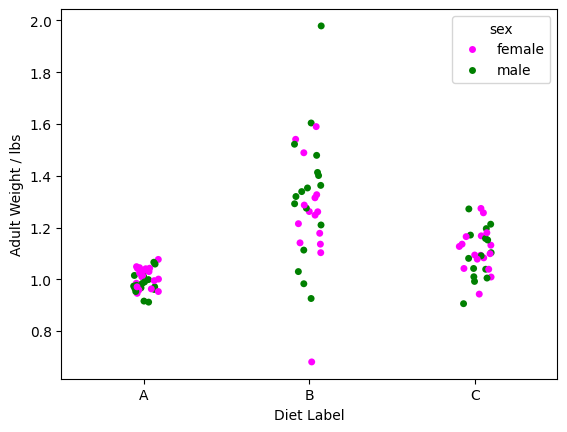

In [76]:
# recreate graph using Seaborn Library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.color_palette(palette="husl")
colors=sns.color_palette(['magenta', 'green'])
sns.stripplot(x='diet_A/B/C', y='weight', hue='sex', data=df_squirrel, palette=colors, order = ['A','B','C'])
plt.xlabel('Diet Label')
plt.ylabel('Adult Weight / lbs')

